**SETTiNGS**

In [1]:
#Select results to plot ('' will load the most recent assimilation file)
filename = ''
filename=filename.replace('/',':')

import os
wd = '/Users/chrishancock/Library/CloudStorage/OneDrive-NorthernArizonaUniversity/Research/Manuscript/DAMP21k/Github/DAMP21ka/' #changed
os.chdir(wd+'Holocene-code') #

# Math Functions
import numpy as np
import scipy.stats
import pandas as pd
import xarray as xr
# Plotting Functions
import matplotlib.pyplot   as plt         # Packages for making figures
import matplotlib.cm       as cm
import matplotlib.gridspec as gridspec
import cartopy.crs         as ccrs        # Packages for mapping in python
import cartopy.feature     as cfeature
import cartopy.util        as cutil
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
# DA Functions
import da_utils_plotting as da_plot
import da_load_proxies
import da_load_models
import da_psms
print('packages loaded')
font = {'family': 'sans-serif', 'sans-serif': 'Lucida Grande'}

packages loaded


**LOAD DATA**

In [2]:
# If don't define a reconstruction, Get the most recent filename
if filename == '':
    filename = [f for f in os.listdir(wd+'Data/results') if os.path.isdir(os.path.join(wd+'Data/results', f))]
    filename = filename[np.argmax([os.path.getmtime(wd+'Data/results/'+f+'/'+f+'.nc') for f in filename])]
print('loading '+filename)
# Load Data
options, DAMPvals, DAMPproxy = da_plot.loadDAMPresults(wd+'Data/results/',filename)

#Define dataframe
proxy_df = pd.DataFrame(DAMPproxy['proxy_metadata'][:,[0,1,2,3,4,5,8,10,12]], columns=['dataSetName','TSid','lat','lon','seasonality_array','season','units','archive','PSM'])
#Convert lat/lons to float
proxy_df['lat'] = [np.float(x) for x in proxy_df['lat']];
proxy_df['lon'] = [np.float(x) for x in proxy_df['lon']];

#Define mapping settings
#options['assimilate_selected_region'] = [15.0, 65.0, 190.0, 360.0]
if options['assimilate_selected_region']:
    lims,proj = [], ccrs.PlateCarree()
    for x in options['assimilate_selected_region']:
        if x < 180: lims.append(x)
        else: lims.append(x-360)
    lims = np.array(lims)[[2,3,0,1]]
else:     
    lims,proj = False, ccrs.Robinson()

    
inputArray = da_load_models.load_model_data(options)

loading DAMP21ka
DA reconstruction loaded for variables:
['tas [degC]']
['LakeStatus [percentile]']
['precip [mm/day]']
Loading variable tas for model 1/2: DAMP_TraCE_regrid


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/4148439911.py:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  proxy_df['lat'] = [np.float(x) for x in proxy_df['lat']];
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/4148439911.py:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  proxy_df['lon'] = [np.floa

Loading variable tas for model 2/2: DAMP_HadCM_regrid
Loading variable LakeStatus for model 1/2: DAMP_TraCE_regrid
Loading variable LakeStatus for model 2/2: DAMP_HadCM_regrid


/Users/chrishancock/Library/CloudStorage/OneDrive-NorthernArizonaUniversity/Research/Manuscript/DAMP21k/Github/DAMP21ka/Holocene-code/da_psms.py:145: RuntimeWarning: invalid value encountered in divide
  ranks = ranks / np.nanmax(ranks)


Loading variable precip for model 1/2: DAMP_TraCE_regrid
Loading variable precip for model 2/2: DAMP_HadCM_regrid

=== MODEL DATA LOADED ===
Models loaded    (n=2):['DAMP_TraCE_regrid', 'DAMP_HadCM_regrid']
Variables loaded (n=3):['tas', 'LakeStatus', 'precip']
---
Data stored in dictionary "model_data", with keys and dimensions:
               units ()                  
                 lat (64,)               
                 lon (96,)               
              season (10,)               
                 tas (840, 5, 64, 96)    
                 age (840,)              
          tas_annual (840, 64, 96)       
             tas_jja (840, 64, 96)       
             tas_djf (840, 64, 96)       
          valid_inds (840,)              
              number (840,)              
          LakeStatus (840, 1, 64, 96)    
   LakeStatus_annual (840, 64, 96)       
      LakeStatus_jja (840, 64, 96)       
      LakeStatus_djf (840, 64, 96)       
              precip (840, 5, 64, 96) 

**ALSO LOAD POLLEN DATA**

In [3]:
optionsValidate = options
optionsValidate['assimilate_selected_HCproxies'] = ['CalibratedPollen']
optionsValidate['proxy_datasets_to_assimilate'] = ['hydro12k']
optionsValidate['version_hydro12k'] = '0_7_0'
optionsValidate['assimilate_selected_seasons'] = ['annual']

proxy_ts,collection_all = da_load_proxies.load_proxies(options)
proxy_pollen = da_load_proxies.process_proxies(proxy_ts,collection_all,options)

proxy_pollen_df =  pd.DataFrame(proxy_pollen['metadata'][:,[0,1,2,3,5,8,10,12]], 
                                columns=['dataSetName','TSid','lat','lon','season','units','archive','PSM'])

proxy_pollen_df['lat'] = proxy_pollen['lats']
proxy_pollen_df['lon'] = proxy_pollen['lons']

Loading proxy dataset 1/1: hydro12k
"seasonality" key not found for index 14272
Number of hydro12k records selected: 350

=== Processing proxy data. This can take a few minutes. Please wait. ===
Proxy 0 PSM selected: get_precip | Lake pollen P mm/a
Proxy 1 PSM selected: get_precip | Lake pollen P mm/a
Proxy 2 PSM selected: get_precip | Lake pollen P mm/a
Proxy 3 PSM selected: get_precip | Lake pollen P mm/a
Proxy 4 PSM selected: get_precip | Lake pollen P mm/a
Proxy 5 PSM selected: get_precip | Lake pollen P mm/a
Proxy 6 PSM selected: get_precip | Lake pollen P mm/a
Proxy 7 PSM selected: get_precip | River pollen P mm/a
Proxy 8 PSM selected: get_precip | Lake pollen P mm/a
Proxy 9 PSM selected: get_precip | Lake pollen P mm/a
Proxy 10 PSM selected: get_precip | Lake pollen P mm/a
Proxy 11 PSM selected: get_precip | Peat pollen P mm/a
Proxy 12 PSM selected: get_precip | LakeSediment pollen P mm/a
Proxy 13 PSM selected: get_precip | Lake pollen P mm/a
Proxy 14 PSM selected: get_precip | 

/Users/chrishancock/opt/anaconda3/envs/DAMP12k/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/chrishancock/Library/CloudStorage/OneDrive-NorthernArizonaUniversity/Research/Manuscript/DAMP21k/Github/DAMP21ka/Holocene-code/da_load_proxies.py:378: RuntimeWarning: Mean of empty slice
  res_avg              = np.nanmean(proxy_res_interp[ind_selected])


Proxy 38 PSM selected: get_precip | Lake pollen P mm/a
Proxy 39 PSM selected: get_precip | Bog pollen P mm/a
Proxy 40 PSM selected: get_precip | Peat pollen P mm/a
Proxy 41 PSM selected: get_precip | Fluvial pollen P mm/a
Proxy 42 PSM selected: get_precip | Lake pollen P mm/a
Proxy 43 PSM selected: get_precip | Lake pollen P mm/a
Proxy 44 PSM selected: get_precip | Lake pollen P mm/a
Proxy 45 PSM selected: get_precip | Lake pollen P mm/a
Proxy 46 PSM selected: get_precip | Lake pollen P mm/a
Proxy 47 PSM selected: get_precip | Peat pollen P mm/a
Proxy 48 PSM selected: get_precip | Peat pollen P mm/a
Proxy 49 PSM selected: get_precip | Peat pollen P mm/a
Proxy 50 PSM selected: get_precip | Peat pollen P mm/a
Proxy 51 PSM selected: get_precip | LakeSediment pollen P mm/a
Proxy 52 PSM selected: get_precip | Lake pollen P mm/a
Proxy 53 PSM selected: get_precip | Lake pollen P mm/a
Proxy 54 PSM selected: get_precip | Lake pollen P mm/a
Proxy 55 PSM selected: get_precip | Lake pollen P mm/a


Proxy 211 PSM selected: get_precip | Lake pollen P mm/a
Proxy 212 PSM selected: get_precip | LakeSediment pollen P mm/a
Proxy 213 PSM selected: get_precip | Peat pollen P mm/a
Proxy 214 PSM selected: get_precip | Peat pollen P mm/a
Proxy 215 PSM selected: get_precip | Lake pollen P mm/a
Proxy 216 PSM selected: get_precip | LakeSediment pollen P mm/a
Proxy 217 PSM selected: get_precip | Lake pollen P mm/a
Proxy 218 PSM selected: get_precip | Swamp pollen P mm/a
Proxy 219 PSM selected: get_precip | Lake pollen P mm/a
Proxy 220 PSM selected: get_precip | River pollen P mm/a
Proxy 221 PSM selected: get_precip | Lake pollen P mm/a
Proxy 222 PSM selected: get_precip | Lake pollen P mm/a
Proxy 223 PSM selected: get_precip | Lake pollen P mm/a
Proxy 224 PSM selected: get_precip | Lake pollen P mm/a
Proxy 225 PSM selected: get_precip | Lake pollen P mm/a
Proxy 226 PSM selected: get_precip | Lake pollen P mm/a
Proxy 227 PSM selected: get_precip | Peat pollen P mm/a
Proxy 228 PSM selected: get_pr

**SKILL PARAMETERS**

In [4]:
agemin,agemax = 0,21000
method = 'Corr'
#
#
mlats,mlons = DAMPvals['precip']['recon'].lat.data, DAMPvals['precip']['recon'].lon.data
#
skillMat = {'LakeStatus':{},'precip':{}}
for vn in skillMat.keys():
    if vn == 'LakeStatus': skill_df = proxy_df[:]
    elif vn == 'precip':   skill_df = proxy_pollen_df[:]
    skill_df[method+'_prior'],skill_df[method+'_recon'],skill_df[method+'_diff'] = np.NaN, np.NaN, np.NaN
    skill_df[method+'_prior_p'],skill_df[method+'_recon_p'],skill_df[method+'_diff_p'] = np.NaN, np.NaN, np.NaN
    skillMat[vn]['df'] = skill_df


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2308703184.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skill_df[method+'_prior'],skill_df[method+'_recon'],skill_df[method+'_diff'] = np.NaN, np.NaN, np.NaN
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2308703184.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skill_df[method+'_prior'],skill_df[method+'_recon'],skill_df[method+'_diff'] = np.NaN, np.NaN, np.NaN
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipy

In [5]:
for vn in skillMat.keys():
    for p in range(len(skillMat[vn]['df'])): 
        proxy = skillMat[vn]['df'].iloc[p] 
        pdict = {'lats':[proxy.lat],'lons':[proxy.lon],'seasonality_array':[[1,2,3,4,5,6,7,8,9,10,11,12]]}
        #Get proxy values
        if vn == 'LakeStatus': proxyvals = DAMPproxy['values_binned'][p]
        elif vn == 'precip': proxyvals = proxy_pollen['values_binned'][p]
        for d,data in enumerate(['prior','recon']):
            #Get prior/recon data
            vals = DAMPvals[vn][data]
            modelvals = da_psms.get_model_values({vn:vals,'lat':mlats,'lon':mlons},pdict,vn,0)
            agesvalid = (modelvals.ages>=agemin) & (modelvals.ages<=agemax) #& np.isfinite(proxyvals) & np.sum(np.isfinite(modelvals),axis=1)>0            
            #Calc skills
            skills = []
            pvals = []
            if vn == 'LakeStatus': its = modelvals.iteration[np.sum(DAMPproxy['proxies_assimilated'],axis=0)[:,p]==0]
            else:                  its = modelvals.iteration
            for i in its:
                v1,v2 = modelvals[agesvalid,i],proxyvals[agesvalid]
                if np.sum(np.isfinite(v1)) == 0:  continue 
                r,pval = da_plot.calcSkill(method,v1,v2)
                skills.append(r)
                pvals.append(pval)
            #Save
            print(np.mean(skills))
            skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
            skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
    #Calc diff
    skillMat[vn]['df'][method+'_diff'] = skillMat[vn]['df'][method+'_recon'] - skillMat[vn]['df'][method+'_prior']
    print(np.nanmean(skillMat[vn]['df'][method+'_diff']))  

0.4875966130863254
0.49699469862978624
0.11674686559495737
0.5851901905299282
-0.7847958874430102
-0.7859488161734686


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.5232310608109566
-0.2754536644886772
0.8664269679645322
0.7424584925276142
-0.5177343784781934
0.31010385940199614
0.43046185037012
0.2093895961846588
0.3664826931332976
-0.47336353117565133
0.09463066088181525
0.6790808559328071
-0.4605362238605071
-0.2310557023930797
0.10737422705047887
-0.6402842175727712
-0.841283546980452
-0.3409932836267752
-0.33300653175875755
0.12517023336991873
-0.7162410047010449
-0.4695079478937763
0.13639016777481214
-0.10926702404470638
0.280349637032788
0.5101736733296907
-0.25376304524136567
-0.10550490187355308


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.06025164538718072
0.7800501182525829
0.23066558201977236
0.031559964531069344
0.6535474286975679
0.8081387231428445
0.1741487154171794
0.06612583184276188
0.44424319776932253
0.4591682277546032
0.8661083034604271
0.8861976707052519
-0.6880577491799389
-0.37043910000700137
0.2878447827395857
0.3406861297536635
0.4616731389198097


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.6989420821553658
0.7689580066779744
0.588585218771801
0.1688276986811583
0.07967144684721432
0.5271830519729397
0.5062500193620798
0.8952883173082673
0.8627332681870257
-0.09380358570007097
0.0728629879888341
-0.48744498638089495
-0.3404698319686531
0.37737911500655935
0.5362870224228459
0.6525361323618577
0.7278616144891894
-0.9146332631422741
0.7592383250252013
0.7245130885357066
0.6648644229051016
0.2546036751760376
0.5309201880870311
-0.5413423433488682
-0.462267553421352
-0.7098264509240167


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.35229420949754087
0.9582818654954597
0.9282913616542764
-0.9070186478426542
-0.4061542061206089
0.1968790296274102
0.6482384298724246
0.07231878875601172
0.19700051342381575
0.6084602418527852
0.7865655926399805
-0.49276458340507323
-0.3334638035170191
0.6299088269251675


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.5771732741021709
-0.16068733527776316
0.6537669363645396
0.8455382018781992
0.7946780281561331
-0.3173409346899325
0.09727523079323233
0.04530859388294033
0.21589015059293057
0.8660781036385283
0.8401604441932595
0.4259161102367276
0.06960507953532895
-0.28476183217812545
-0.23958544802119572
-0.42943345212007444
0.11624520292180887
0.5170555215263407
0.4866351040041753
-0.6289573738765651
-0.3940652594324508
-0.2428875367243967
-0.16934128928333078
0.6029300258019666
0.36852622192695256
-0.8845615009943502
-0.10382750608488062
-0.7963537037450074
-0.6243763635529441
0.24859191675968909
0.2707405218859882
-0.08878626706035424


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

-0.7765677122946394
-0.4218617460941773
-0.3983717296683594
0.09268324673981448
0.03841010547276242
0.4638818272120811
0.7650015539382317
0.11947593652674036
0.25867669897157186
-0.19564577510109626
0.4652410164707644
-0.45481079174822087
-0.4082686920965464
0.3237013890229479
0.4541126646361908
-0.25806459775236446


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

-0.276072109803242
0.3273114168166038
0.3281473095779935
0.7947989272481019
0.6667008860358591
0.7302907700898388
0.7237961536282365
0.1725429307712373
0.31906362013204675
0.7633900327012357
0.7674772674089384
0.5119043317751738
0.6544559076073662
0.08338178951783336
0.13660482088537576
-0.7313626464940326
0.4571164903720629
0.3549107025986779
0.552893408902318
-0.09044004992297712
0.3558675120560556
0.5050223021571596
0.4395433671910405
0.1487822889015219


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.37965432452551134
0.33588528061595224
0.5253724356145548
0.8422280707797456
0.73714888381137
-0.12632440249515836
0.055919191035171734
-0.29875600200739155
-0.5674433604182417
-0.5883500363198498
0.08972035163234887
-0.6250417116772234
0.01712366306298048
0.42690631196271633
0.6757149685590178


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

-0.7842719538960313
-0.7359822820038101
-0.004192280316107685
-0.27699124208434145
-0.6758269597212765
-0.4347108894623576
0.7219023551571194
0.17252947582789388
0.8424719468055789
0.9086448507078541
0.6838260917718397
0.7286245496837221
0.35924823449079385
0.13372272523604078
0.5100755576785185
0.47624473434616416
-0.349517138207871
-0.09249619548108047
-0.6817370042453713
-0.18352672639549486
-0.1690486315635547
0.12251411257222791
0.842409557361142
0.8993828874204084
0.4470539231118714
0.6083353458382383
0.6138823669435434
0.06211912248363202
0.3723116508849234
0.41934109889376997
0.8358976541460917


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.8409455315302847
0.7962519272351203
0.8433961145740678
-0.6658268484377985
-0.6821293558731834
-0.33580691726560974
-0.3964681804799889
0.22507844022234294
0.20477988496007765
0.6040528842833394
0.6246936004110418
-0.13757266315970523
0.11750691413608562
0.31700936414478126
0.6478072198878936


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.41378020442106195
0.533167066244378
0.6074607588230212
0.5289733294998528
-0.5610373401442137
0.7607948608110752
0.41941308815924644
0.14277761823312268
-0.22123862609493627
0.5540526691324295
-0.11940146228427266
-0.36135350831114765
-0.6236975390181035
-0.6307885652184658
0.8091392265730035
0.8541959803037054
-0.24828485709021816
0.6408147011688724
-0.45164458790047823
-0.4535219872217027
0.7616912837218199
0.7545974527370534
0.47624853025941427
-0.36502811661863
0.6712605263783021
0.6664195286321394
-0.9439581325495661
0.8583393682740468
-0.9220272989972177
-0.9115980016784397
0.6767145585975416
0.8280355373010603


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

-0.002030913114902301
0.3046818894832618
0.7820854939515636
0.918385992825228
0.5499072061257722
0.7801165287978866
0.5208215801274705
0.2665264375560164
0.8404358028030174
0.16455442753152083
0.648399286488983
0.14832193176456393
0.5862794513805641
-0.013761604330040913
-0.671676012534101
-0.006612735680609105


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.7683929347100571
0.8584249494251553
-0.8477187536124781
-0.6727181650542474
0.28149320857167526
0.6281613604446624
-0.6501256758244136
-0.10403749365413237
-0.5739922777619885
-0.48021060292394196
-0.4307071065000901
-0.5575076922868829
0.6204692470114858
0.20360670109299817
0.7613996762201211
0.7571672901141149
0.5753048616565851
0.23243181984266884
0.5854909296542745
0.6463116706001738
-0.4234419960586291


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.21699116452527256
0.645870186859975
0.6636269678146586
0.7646292779068127
-0.08888545909206896
-0.3927853513242264
-0.25394657571646734
-0.8282990353704218
-0.8152829931541401
0.050579951209350604
0.705451934830446
0.6126139599212423
0.5721848838090229
-0.43594852071430373
0.6743947293144276
0.6139636558142586
0.6266737641225651


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

-0.1868216636240809
-0.1954860977590489
0.8766625183270711
0.40955544896585777
0.5668714827666508
0.3126599820536695
0.28917859849892374
0.32563714378230835
0.8559459562881574
0.869910829214482
0.46747799075218877
0.29946266332754823
0.6195843324392742
0.8160050813868759
0.39514623035793217
0.4714677356279801
0.13241229365672158
0.33123578439253865
-0.5521146031179729
-0.4455350893270351
-0.9160525937313361
-0.9436090369655692
-0.7325167958655269
0.3659282979749131
0.12197947553621304
0.26404263655366317


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.48588642580614644
0.8018727127888464
-0.3444399180811247
-0.42078257506935984
0.7422501248449502
0.08027367183550485
-0.09140943147732883
0.04548259709404082
0.3667457336985793
-0.3337582152665846
0.4191045236621453
0.43838067662771046
-0.22101920465131789
-0.16761692088350588
0.4412040004540419
0.34402436371287126
0.7528071636146625


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

-0.2930682261982058
-0.027169996415908657
-0.07612197622371292
0.1637593026895067
0.5488081405305152
-0.3773187165078846
-0.34975887331430044
0.14320723291141832
0.32998550992130943
0.11840359529586894
0.48673767518771255
0.17221057259169728
0.5566430560144335
0.2303810869397401
0.7670318064943031
0.26564343231077847
0.13105313412529337
0.34703179329252737
0.4729624596082001
-0.665421490376453
0.08120225324418161
0.8313938701921397
0.7564135972692532
0.3069465340905678
0.04617194008590796
-0.9141654507584153
-0.3910442133690804
-0.22947585601161472
0.27531291190904594


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.7191629939296016
0.15957182481651913
0.7178005584771135
0.36033689543911973
-0.3789409303526104
-0.04152377866160564
0.36362688331134446
0.8323925426368427
-0.772979175196657
-0.09101928837900744
0.7045318052072329
0.5291400217118832
0.5506596504027943
0.4725529376690425


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.21415621054623282
0.21251170486062118
-0.48855334952493834
0.22536787713541023
-0.9299041875941253
0.6206502866165481
-0.018237121302897938
0.5550605293523072
0.7665146245997921
0.7840922216547783
-0.17395011950632866
-0.6001896687124543
0.4761318843665901
0.68247511558722
-0.1789135461720907
-0.10770558741700795
0.8068568278518948
0.7973920632989056
0.8140561299615893
0.7680803338569208
0.33245270815535594
-0.12316364176135058
-0.2765878470639381
-0.09786895484730286
0.19982866815765127
0.08514140786161975
0.19100587824236048
-0.05657459379970212
0.8296011652649625


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.808746653633967
0.18320190904297248
-0.19806943658703946
0.0907964979242764
0.2866790562390778
0.71274656418128
0.6374796217472171
0.10806337231225918


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.09962306504469294
0.20538968201076288
0.2863718796845891
0.6053591129734084
0.2117685121274568
0.36305314165573765


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.8997382042641566
0.8022301106487315
0.8644122080566177
0.7971086095043287
0.8653262602426212
0.8020990958030787


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.8793658280883963
0.8049767673562268
0.8962430468519799
0.8302279778930188
0.6115749403601819
0.8349454557451456
-0.7523355433093839
-0.5339852586581092
0.6949065600994493
0.725068635311715


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.8697390356156374
0.8705504660953401
0.4898211802328585
0.8923215697827894
0.4508472667444619
0.43043585863958667


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.6954898552956178
0.5511100752709588
-0.3567699188106197
-0.5003447578483253
0.034059254613269266
-0.2009683661279079
0.7858240604225297
0.747028522257855


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.49011811270104577
-0.3982927790825915
0.9099736263652389
0.7287286937551161
0.8260680347243505


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.7563748878698412
0.6515665436872433
0.6567467018044952
-0.44664917304431195
-0.12924627305415676
0.9467645209941594
0.8729359468023997
0.7387710991099314
0.6104514501594496
0.9209543374738699
0.8353278818680365


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.4448398656755244
0.6611965232724237
0.9136297157834623
0.8244495945625404
0.3510587636397892


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.4213862670349663
0.24838227593404855
-0.16237726187990725
0.6973022190343261
0.14470500520592058
0.23016595622892294
0.49336332154546036
0.40641934920649714
-0.15067606296303698
0.1030973705741817
0.1080393595183399


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

-0.3834933093959437
-0.15845179535592302
0.6199105664603272
-0.5084963471100326
0.3474183478443753


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.5663577095610403
0.8360177441639488
0.5252875698789565
0.6086182838774472
0.6992276977136168
0.9170672384583339
0.9147865080670821
-0.010646613956218147
0.2351013236371803
0.43926653016611716
0.18261575464868313
0.4646900449186685


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.6882319447485228
-0.33346371995007995
-0.02985663542266128
0.9558625076154394
0.9450984917762997


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.5526389741216347
0.7742480685203808
0.9545251908711359
0.947109420144522
0.766163056973437
0.7146175036235334
0.6922482386726256
0.6124444363195546
0.4979993844809821
-0.2686334809532389
0.8900029934745326
0.8591544149773455


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

-0.5736070759630852
-0.5938591294278669
0.530161930241325
0.2779333180651372
-0.21855555331863746


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.14306748311204956
0.8911377309231403
0.8631365334583074
0.26006289435325836
0.5908182242605364
0.9288822666319027
0.8374623078320477
0.8110579171616384
0.5674582036485833
-0.5821956331692332
-0.6875943628291348
0.8620610280037839


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.3587108910795606
0.8436542573835654
0.8048773105873567
0.6200473439896814
0.37706644547149415
0.5855498645420337


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.5491415119866019
0.8815426340418929
0.8396692478060339
-0.015339435198112678
0.19986360865593675
0.9136837379516421
0.7451760121803078
-0.4183719005802075
-0.31257609761347155
-0.767993395994908
-0.06940794283359805


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

-0.07015300560174781
-0.41609227815794697
0.8336632352250746
0.676864503149503
0.9063642669269354
0.6641427977072117


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

-0.17872246868908576
0.6734972527212395
-0.40089563850848736
0.3808610164203704
0.7116622152264748
0.4618045884743589
-0.3467415229048389
-0.15154534743104325
-0.42080328892871394
-0.15114049456471196


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

-0.4914580881690423
-0.47351598689298047
0.13356643092542242
0.11329848796657885
0.19441231304253118
0.25459983072415093
0.8921420274055272


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.8866731026263072
-0.2527350899341995
-0.25613802848199424
0.07990545427971243
-0.1538873767867658
-0.7150672276766775
-0.6193149503328186
0.36949072473290373
0.18264356184965136
0.6878142965902404


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.8790126884135315
-0.7314223296318735
-0.15642725937256033
0.7746759343194427
0.6526814992449465
-0.5300119779030743
-0.5630379371911542
0.9194925595262371


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.8547141927798731
-0.1334494124894122
-0.04281621240536758
0.6493209263117337
0.6241980011524318
-0.5191005509825598
-0.7485708133354346
0.8455022073350748
0.2743940283832898


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.7570923320097409
0.6189821487465647
0.9449211589450515
0.9203972440800285
0.06646178805120696
0.20329118489924683
0.6149477377818737
0.3486422138308008


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.9463263199544463
0.933902060658221
0.9564302944845242
0.8513234874483928
0.6943006043754169
0.6552570250232305
0.7884691752246982
0.5197886141411897
0.836332831386604


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.7268948229467442
0.7794383825031681
0.8047353242005111
0.06469885750821358
-0.2844271247180341
0.590420114005545
-0.24695721805648657
0.3264153042352337


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.3880497846804848
0.7561007021032004
0.7727892671847347
0.6160842440987986
0.4663127761732963
-0.020468974631367286
0.6923787386250279
0.7553427658678046
0.7875768681883165


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

-0.43628135296970083
-0.14262706812165143
0.49006004226315125
0.45485432779541
-0.5085222824756493
-0.4156055747521192
-0.7167397660731555
-0.6405362670470166


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.8429862641112782
0.8356013903550659
0.7230353893167173
0.7106744510997249
0.39850883589682706
0.36317350424542116
0.6877194174318787
0.5278716746445287
0.848358461474499
0.7812726069723878


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.7497230802732264
0.5648384285929737
0.8184185969334914
0.6868364784258306
0.5597858580726159
0.691511821077511
0.8856800592357068
0.887563449021787


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

-0.7199779747610775
-0.4765920237560037
0.2564000544744231
0.5987985830597369
-0.3460751402847208
-0.04921825399695027
0.9412024313211657
0.7716055087770075
-0.6374482870290272


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

-0.26740529885745945
0.5508118189193898
-0.018386207447438775
0.35927000404663095
0.15534434167655764
0.8245957340915149
0.8515696053449263
-0.7997270377719661


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

-0.7631188938844097
-0.7362937498132991
0.3863652269996454
0.18409437827587424
0.16326627369482838
-0.512396812124454
-0.5383568195662762
0.9547277457198963


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.9503040404373095
-0.36206691624656545
-0.26605400216661124
0.6223810322233277
0.2868326760206041
0.673643309108436
0.8040865838949692


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.4088623611621728
0.15059983945418343
0.5296437213829394
0.4658673977363373
-0.30958065766143306
-0.2173873377809327
0.7107275948684109
0.710362681912031
0.8073496332025748


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.5728422239276061
0.2889325713240861
0.35152585798058744
0.9695782150837478
0.814573331032529
0.9368487293558898
0.9183930776914698
0.9162137272062532


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.921671343371728
0.94008337748095
0.7987514615896842
0.45595589079094057
0.54472268678929
0.4415837789954559
0.5385928063267246
0.9019436487843787
0.9187290159130616


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

-0.5827877805796234
-0.37710782615000726
-0.6273580471994956
-0.5868577615297315
0.7529848420342503
0.031241238806531874
-0.4088470298987115
0.2741836240348464


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.5029882996741054
0.1142987537295211
0.1931276028918556
0.8348665166833354
-0.48170120491779445
-0.26238735117956546
0.808472046439309
0.4925029595328955


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

-0.5230981345934944
-0.3460802327445671
0.8948355619971464
0.9413098356129292
0.9021448192819914
0.8299661503972814
0.8464612658511037
0.684971521487056
0.8779920885586883


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.32909290301150795
-0.8891960793964102
-0.8629510725336905
-0.690857791885026
-0.6963282472046505
0.315320196990333


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.4906432000864789
0.7935095069563779
0.7749202544306828
0.4474930113099577
0.47789246938987884
0.7843399047459866
0.5561056761376676
-0.8634404791826296
-0.7258593891013968
-0.21604909686131882
-0.3051230136823169


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.9262383924682125
0.9289820479832527
-0.23051589551326068
-0.1150275197045342
0.04804297690786563


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

-0.12873267840679276
0.8358003036533909
0.7641337303847355
0.9479338793164059
0.8279301044727727
-0.17707901062542947
0.4022493099225272
0.8863343572400568
0.752036031863252
-0.24894304719568944
-0.23633657470048802


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.8830305243839783
0.8565616742623176
0.9313072447659028
0.8140765695308412
0.6970670360244264
0.5860636141546213


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.8539736502048327
0.8734430207550508
0.7257153580110716
0.6817578380246168
0.3423133110569368
0.16458538757593083
0.38410750005598027
0.4565191192062151
0.2658986448613453
0.6594325797880305
0.8959820626444085


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.7873550939714781
0.7059122663503039
0.06813853472075052
0.8642545470558843
0.7320968769588456
0.7389361643941011


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.7669860544367171
0.607383930162865
0.7393564086880386
0.36801929270792194
0.3962756388755548
-0.3820161003060355
-0.36162896558260665
0.7566106218823956
0.7498468440705562
0.4170235381802794


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.3436697509008575
-0.7692815012794527
0.01406526954549891
0.8437135360757975
0.779438297167309
-0.42060312819139095


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

-0.3724926134289637
-0.183600228194756
-0.3115153118209688
-0.24382335100668526
-0.02285724147878269
0.8935581506730049
0.8868094293525519
0.9168364663824875
0.7603283941611996
0.5563603408274913
0.7524779109334597


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.678194576094446
0.6784480083715293
0.3162227363683468
0.46047482306722803
0.9159943064008189
0.4914151555506475


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.915488440062543
0.9170857551098657
0.545677896809497
0.7283087371036259
-0.37178653652995625
-0.5094533417738705
0.4556239094574325
0.5298195595949177
0.8753177064488031
0.8634994434313823
0.8472915459040905


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.7401444973517047
0.8663034993176074
0.8437084645974403
-0.442125472668204
-0.5036737794516435
0.7668633719240371


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.7023003052343192
0.884060422597629
0.9021194816639679
0.8987456472447326
0.8502317139932613
-0.2725806024429147
-0.3954784349189749
0.37745207670653014
0.6909876332529505
-0.03361941882495102
-0.13302978248393327


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

-0.5615146426688181
-0.4256683127316183
0.9563226060571657
0.8976661208158507
0.9191991762316949
0.953102194067805


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.3938611934210908
0.12832322400950721
0.7630939217101441
0.7992817514277667
0.4643793032808774
0.46167333164627566
-0.2078567584199437
-0.12722123854244344
-0.9049976719300836
0.8301238433333614
0.2183185976536483


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.26542909536878406
-0.10378947420321298
-0.2289621081788797


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.8792910838343693
0.8004036527850171
0.8839817081683554
0.7086838623223457
0.5578405155534767
0.6321950187692453
0.6558900991724247
0.5545589939067176
-0.5289254914069542
-0.2520176592728622
0.9639000871291227
0.9041041841664349
0.23142014568349317


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.6463121026567776
0.7300041003173153
0.6422054917020092


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.656967812647778
0.5157509546712391
0.6804716714230865
0.7979592580926157
-0.12922802542509512
-0.1724987291921392
0.7847957199781169
0.6278185710272539
0.7148084174005438
0.877415431044447
0.7734627642758356
0.7406584553717218
0.8412260567816234
0.45298805711130824


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.5244643663200083
0.6025952280505549
-0.32382314225624065


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

-0.0737852612770965
0.8254809109625171
0.7016236123088977
-0.008616092872233848
0.198317833734207
-0.4220503570936856
0.83815273992516
0.5156889674982513
0.2696029400706597
0.22022955077234174
0.3025894917950699
-0.8795928615042309
-0.7754496135207056
0.9452253464777284


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.8102534758724949
0.33374733124392825
0.3174825243889134


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

-0.24834248623786342
-0.11966227178522422
0.9381633593902517
0.8477141655120958
0.7993704690970492
0.8887403879953283
0.30095363897696387
0.02519300767843622
0.9010385945152191
0.7283858611673032
0.5647182940590371
0.4997232795689593
0.5973931786102218
0.5373979313883332


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.4015212972290776
0.41842975147715433
0.826979602467091


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.7886121800735955
0.6357521486287226
0.6543145397140926
0.9163550946156122
0.7785958517564991
0.9099306693543099
0.8792192311886984
-0.38154585518290024
0.06712732105979102
-0.46944723535085126
-0.2251795070402504
0.28441849792150486
-0.0630516847099081
0.8006887490421317


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.6139942989368578
0.6529686166250778
0.8498746376969063


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.16783833416023963
-0.16194541386087374
0.803515416164608
0.319993698831204
0.6830246373994744
0.6970738624399847
0.025760142845319457
-0.2138163014248208
0.8309363535280575
0.8497689941473101
-0.31790479660626847
-0.2721366060948617
-0.024963133046951427
-0.017966462317605437
0.7946938759802586


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.8533820430836337
0.6040115530773347
0.614944250699977


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

-0.2552578199617039
-0.06144891376038022
0.6798754452588927
0.6756434736664555
0.8533654648106592
0.9107034635896216
0.738954450647445
0.6136393454544972
0.7912258174281934
0.7984081097030999
0.629996200634568
-0.04977344325514751
0.6556627346895756
0.09051191344684643
-0.16495605109303482


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

-0.45976133071356273
0.41996510027082257
0.1930458581888023


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.5734153029830276
0.09914503361770895
-0.4629544644555139
0.12191803534095261
0.9038996419740153
0.7623212487949202
0.5149728039122585
0.532886895725031
-0.5018931192390751
-0.18013499256700996
0.8813618735190033
0.7993962329101753
0.03186404536383343
0.027656771479467452


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.6408697941070094
0.5049797027976697
-0.6596785465424267


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

-0.3643491597028242
0.7880146529594212
0.7762104622236774
-0.2175075472521999
-0.2986211048847829
-0.6403126924335465
-0.5025489281255551
-0.6779806537447447
0.5360834424981542
0.7678294888137805
0.6934638898883724
0.39780301670554624
0.40034310009704244
-0.4355583916951241


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

-0.4191713749210221
0.849471125352666
0.6545388303202898


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.784391401733305
0.5845923486409003
0.7011354548945384
0.7836428247362253
0.5567595111130773
0.3796963768113295
0.7208618570730146
0.5941802155067893
0.8678521925533988
0.7317589884816341
0.8912462367915609
0.7707090307077662
0.9444684839323747
0.8916623097343279


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.9043901047965044
0.9011896222738219
0.507805164175666
0.5004703069181132


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.9237781785640775
0.9488161815402101
0.7255773388744522
0.7431275067096552
0.6495270234715385
0.6176594026333204
0.913196037474048
0.7096239706756393
0.8684170925874029
0.8670369036576064
0.8150852797048189
0.5659211175018177
0.6314334176605769


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.5591786262293263
0.7681484882155545
0.8645496251541841


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.6968367770399985
0.5897255473110371
0.6756465128580814
0.6214782976193548
-0.4866293659758842
-0.44248417704992554
0.8573873151835254
0.837848446276884
0.7227897469675182
0.7131229032377602
0.6162635857795851
0.577938862605804
0.5455236063812793
0.6320907242384225


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.9147358920682025
0.7363064980725282
0.36372605898546284
0.14691493669864483


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.8250078258776756
0.8674622646802094
-0.7344321575143827
-0.6500312464743224
0.9591429040684215
0.9578255364927454
0.713180956277158
0.7081596516293139
0.3268761836150983
0.44393418522807615
0.849699698360582
0.7805826517778767
-0.9092852875356716


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

-0.324158992909982
0.7563840640820172
0.808425449827886
-0.723968551523896


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

-0.44383710529308795
-0.36515908061702707
-0.4008299689679523
0.7882417112901722
0.7309502056060906
-0.44978821654850487
-0.4743399226918907
0.5321259852154212
0.5267568336000041
0.6244624147969575
0.8394886201829268
-0.005481945165102867


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2597433952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [6]:
#
options2=options
options2['minimum_resolution'] = options2['maximum_resolution'] 
inputArray2 = da_load_models.load_model_data(options2)

Loading variable tas for model 1/2: DAMP_TraCE_regrid
Loading variable tas for model 2/2: DAMP_HadCM_regrid
Loading variable LakeStatus for model 1/2: DAMP_TraCE_regrid
Loading variable LakeStatus for model 2/2: DAMP_HadCM_regrid
Loading variable precip for model 1/2: DAMP_TraCE_regrid


/Users/chrishancock/Library/CloudStorage/OneDrive-NorthernArizonaUniversity/Research/Manuscript/DAMP21k/Github/DAMP21ka/Holocene-code/da_psms.py:145: RuntimeWarning: invalid value encountered in divide
  ranks = ranks / np.nanmax(ranks)


Loading variable precip for model 2/2: DAMP_HadCM_regrid

=== MODEL DATA LOADED ===
Models loaded    (n=2):['DAMP_TraCE_regrid', 'DAMP_HadCM_regrid']
Variables loaded (n=3):['tas', 'LakeStatus', 'precip']
---
Data stored in dictionary "model_data", with keys and dimensions:
               units ()                  
                 lat (64,)               
                 lon (96,)               
              season (10,)               
                 tas (84, 5, 64, 96)     
                 age (84,)               
          tas_annual (84, 64, 96)        
             tas_jja (84, 64, 96)        
             tas_djf (84, 64, 96)        
          valid_inds (84,)               
              number (84,)               
          LakeStatus (84, 1, 64, 96)     
   LakeStatus_annual (84, 64, 96)        
      LakeStatus_jja (84, 64, 96)        
      LakeStatus_djf (84, 64, 96)        
              precip (84, 5, 64, 96)     
       precip_annual (84, 64, 96)        
          p

In [7]:
for vn in skillMat.keys():
    for p in range(len(skillMat[vn]['df'])): 
        proxy = skillMat[vn]['df'].iloc[p] 
        pdict = {'lats':[proxy.lat],'lons':[proxy.lon],'seasonality_array':[[1,2,3,4,5,6,7,8,9,10,11,12]]}
        #Get proxy values
        if vn == 'LakeStatus': proxyvals = DAMPproxy['values_binned'][p]
        elif vn == 'precip': proxyvals = proxy_pollen['values_binned'][p]
        for d,data in enumerate(['prior','recon']):
            #Get prior/recon data
            if data == 'recon':
                vals = DAMPvals[vn][data]
                modelvals = da_psms.get_model_values({vn:vals,'lat':mlats,'lon':mlons},pdict,vn,0)
                agesvalid = (modelvals.ages>=agemin) & (modelvals.ages<=agemax) #& np.isfinite(proxyvals) & np.sum(np.isfinite(modelvals),axis=1)>0            
                #Calc skills
                skills = []
                pvals = []
                if vn == 'LakeStatus': its = modelvals.iteration[np.sum(DAMPproxy['proxies_assimilated'],axis=0)[:,p]==0]
                else:                  its = modelvals.iteration
                for i in its:
                    v1,v2 = modelvals[agesvalid,i],proxyvals[agesvalid]
                    if np.sum(np.isfinite(v1)) == 0:  continue 
                    r,pval = da_plot.calcSkill(method,v1,v2)
                    skills.append(r)
                    pvals.append(pval)
            elif data == 'prior':
                skills = []
                pvals = []
                for model in ['T','H']: 
                    vals = DAMPvals[vn][data][:,0:1]
                    if model == 'T': vals.data = inputArray2[vn][:np.shape(vals)[0]]
                    else: vals.data = inputArray2[vn][np.shape(vals)[0]:]
                    #
                    modelvals = da_psms.get_model_values({vn:vals,'lat':mlats,'lon':mlons},pdict,vn,0)
                    agesvalid = (modelvals.ages>=agemin) & (modelvals.ages<=agemax)
                    v1,v2 = modelvals[agesvalid,0],proxyvals[agesvalid]
                    if np.sum(np.isfinite(v1)) == 0:  continue 
                    r,pval = da_plot.calcSkill(method,v1,v2)
                    skills.append(r)
                    pvals.append(pval)
            #Save
            #print(np.mean(skills))
            skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
            skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
    #Calc diff
    skillMat[vn]['df'][method+'_diff'] = skillMat[vn]['df'][method+'_recon'] - skillMat[vn]['df'][method+'_prior']
    print(np.nanmean(skillMat[vn]['df'][method+'_diff']))  

/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2325069849.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2325069849.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2325069849.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2325069849.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2325069849.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2325069849.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2325069849.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2325069849.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2325069849.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2325069849.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2325069849.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2325069849.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2325069849.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2325069849.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2325069849.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2325069849.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2325069849.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2325069849.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2325069849.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2325069849.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2325069849.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2325069849.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2325069849.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data+'_p'][p] = np.nanmedian(pvals)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/2325069849.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.14648912640560652


ValueError: replacement data must match the Variable's shape. replacement data has shape (42, 5, 64, 96); Variable has shape (42, 1, 64, 96)

**PLOT PROXY CORRELATIONS**

In [8]:
#Print
skillMat[vn]['df'].head()

dataSetName                 TSid      lat       lon   
0  HermitLake.Anderson.2018Legacy  lcRXLkyFOBBg5jAZeV9  38.0881  254.3683  \
1      WinneconnetPond.Suter.1985  lcRqcv7HT215BsuiBp5  41.9667  288.8833   
2             MonoLake.Davis.1999  lcRf9gq05AeCrcXDAIG  38.0080  240.9745   
3    BebrukasLake.Kabailiene.1986  lcRuTlqjPrHd2xH329d  54.0853   24.1211   
4    BebrukasLake.Kabailiene.1986  lcRYFM1oW2BMerncgWT  54.0853   24.1211   

   season units archive         PSM  Corr_prior  Corr_recon  Corr_diff   
0  Annual  mm/a    Lake  get_precip    0.099623    0.205390   0.105767  \
1  Annual  mm/a    Lake  get_precip    0.286372    0.605359   0.318987   
2  Annual  mm/a    Lake  get_precip    0.211769    0.363053   0.151285   
3  Annual  mm/a    Lake  get_precip    0.899738    0.802230  -0.097508   
4  Annual  mm/a    Lake  get_precip    0.864412    0.797109  -0.067304   

   Corr_prior_p  Corr_recon_p  Corr_diff_p  
0  6.083409e-01  3.116243e-01          NaN  
1  1.050515e-01  6.593061e-05          NaN  
2  2.859674e-01  7.410281e-02          NaN  
3  1.320541e-11  1.920783e-07          NaN  
4  1.235127e-11  5.292172e-09          NaN

In [9]:
#How many are significant
print('\nmedian:')
print('Lake Status median (prior):'+str(np.round(np.nanmean(skillMat['LakeStatus']['df']['Corr_prior_p']),2)))
print('Lake Status median (recon):'+str(np.round(np.nanmean(skillMat['LakeStatus']['df']['Corr_recon_p']),2)))

thresh=0.05
print('\n% of Lake Status records significant at p<'+str(thresh)+':')
print('Lake Status prior: '+str(round((sum((skillMat['LakeStatus']['df'][method+'_prior_p']<thresh))/np.shape(skillMat['LakeStatus']['df'])[0])*100,2))+'%')
print('Lake Status recon: '+str(round((sum((skillMat['LakeStatus']['df'][method+'_recon_p']<thresh))/np.shape(skillMat['LakeStatus']['df'])[0])*100,2))+'%')

print('\n% of precip records significant at p<'+str(thresh)+':')
print('precip prior: '+str(round((sum((skillMat['precip']['df'][method+'_prior_p']<thresh))/np.shape(skillMat['precip']['df'])[0])*100,2))+'%')
print('precip recon: '+str(round((sum((skillMat['precip']['df'][method+'_recon_p']<thresh))/np.shape(skillMat['precip']['df'])[0])*100,2))+'%')


median:
Lake Status median (prior):0.18
Lake Status median (recon):0.13

% of Lake Status records significant at p<0.05:
Lake Status prior: 46.76%
Lake Status recon: 59.72%

% of precip records significant at p<0.05:
precip prior: 72.29%
precip recon: 67.43%


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/3997159995.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


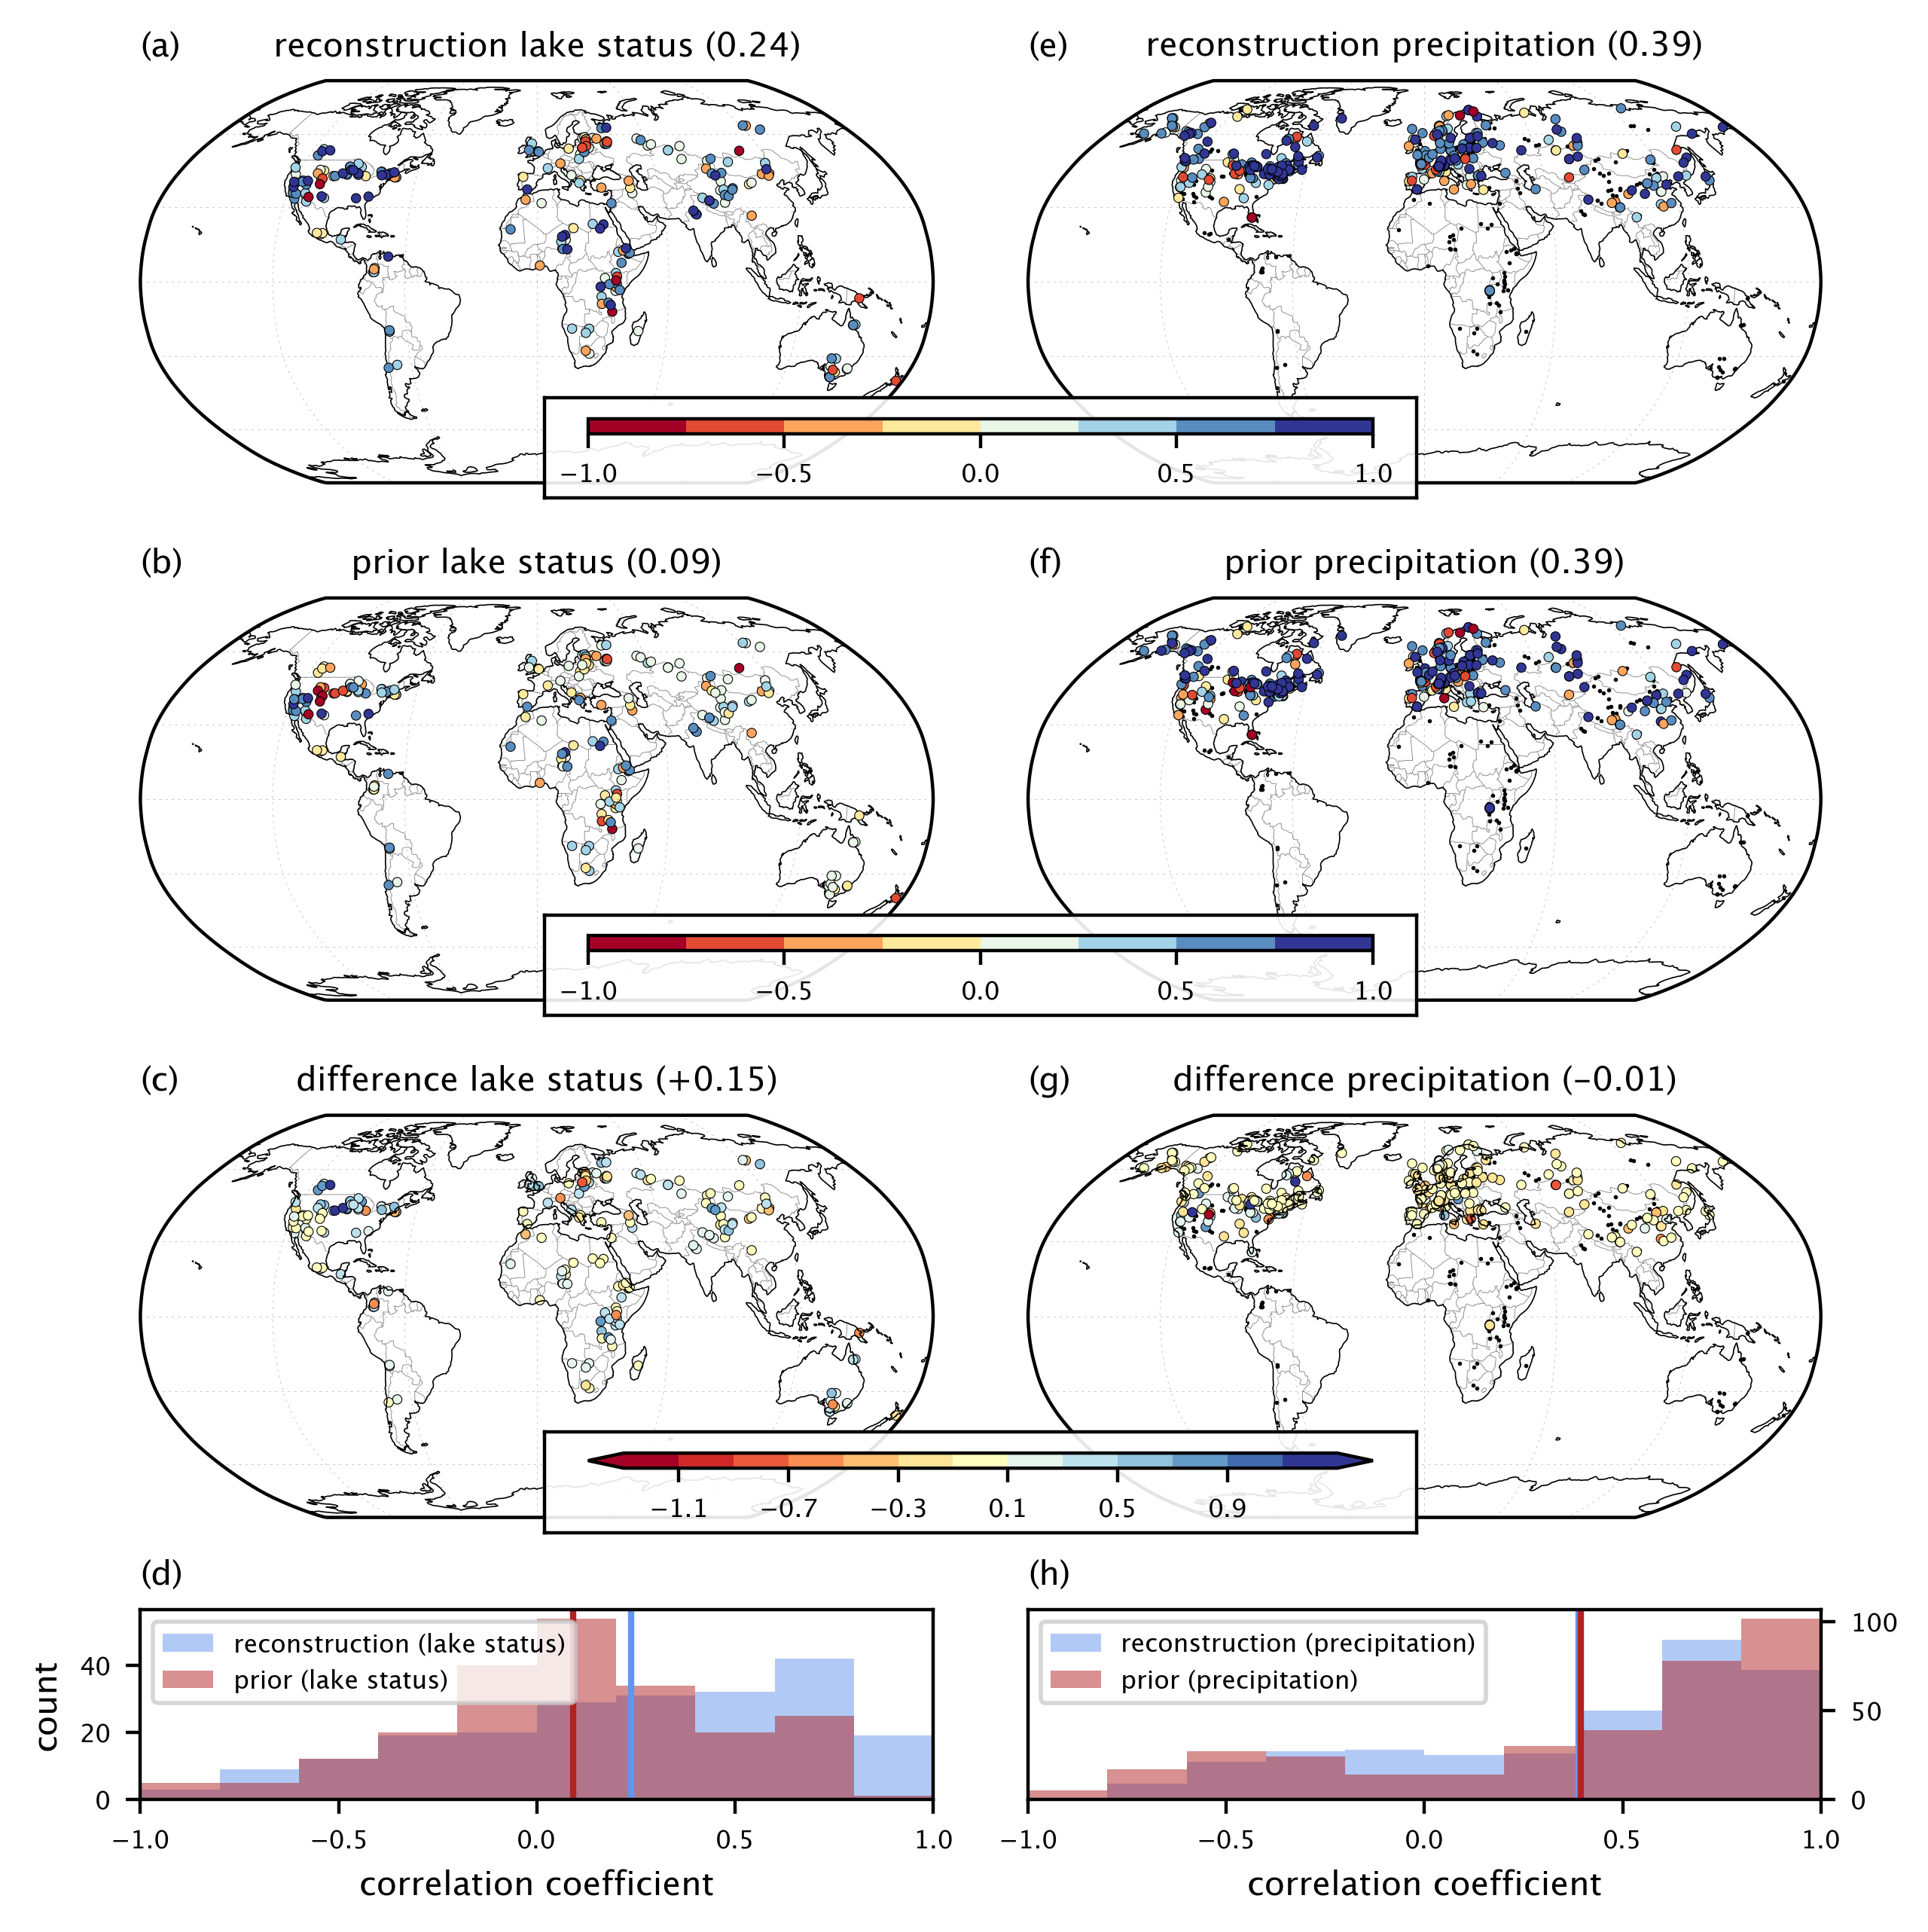

/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_4530/3997159995.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


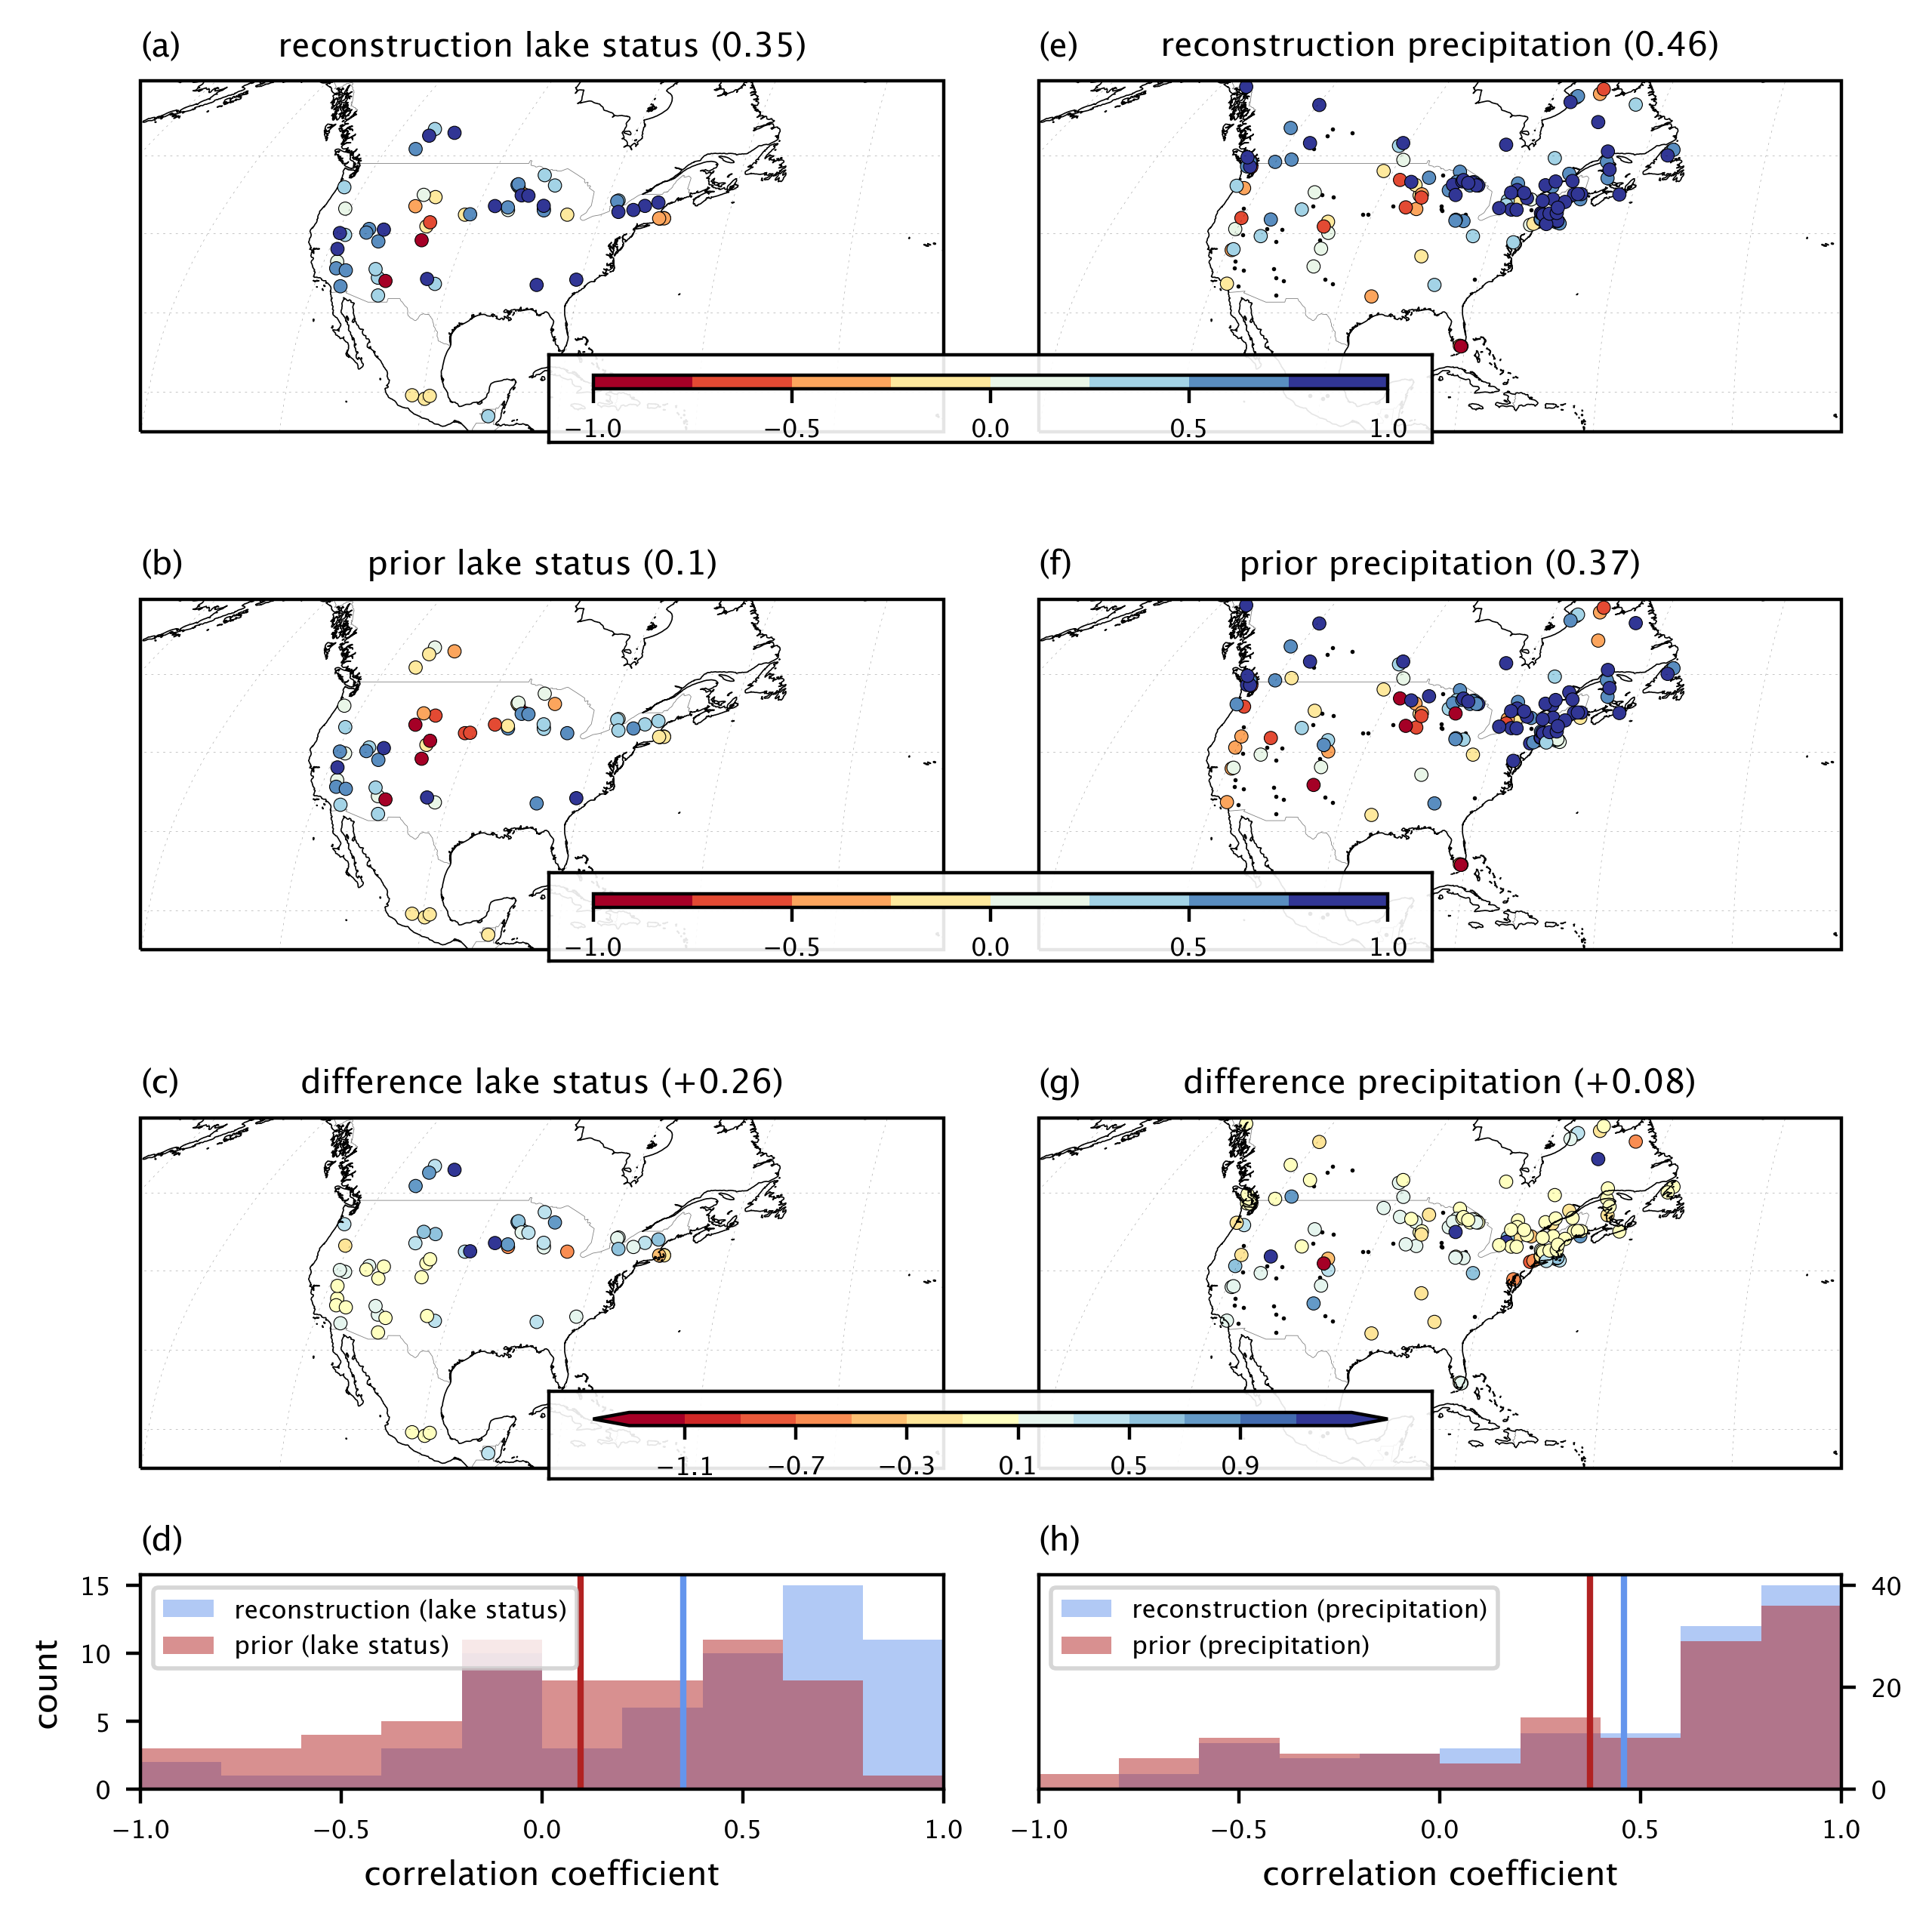

In [10]:
#Map the correlation values
import matplotlib.patches as patches
from matplotlib.patches import Rectangle

#Change the extent variable to select data from a lon/lat range. (Note lon is on a 0-360 scale)
for  extent in [False,[220,330,15,60]]: #lon min, lon max, lat min,lat max
    if extent: s=10
    else: s=5
    #Plot Correlation Skill with withheld proxies
    #Map proxies
    theme = 'default'
    plt.figure(figsize=(6.5,6.5),dpi=400)
    plt.style.use(theme)
    plt.rc('font', **font)
    gs = gridspec.GridSpec(7,2)#,hspace=0.4,wspace=0.1)
    names = [['a','b','c','d'],['e','f','g','h']]
    for col,vn in enumerate(skillMat.keys()):
        vn2 =['lake status','precipitation'][col]
        df = skillMat[vn]['df']
        if extent:
            df = df.loc[(df['lon']>=extent[0]) & (df['lon']<=extent[1]) & (df['lat']>=extent[2]) & (df['lat']<=extent[3])]
        ax_hist = plt.subplot(gs[6,col])
        for row,data in enumerate(['reconstruction','prior','difference']):
            #Set Up Plot
            vals = method+'_'+['recon','prior','diff'][row]
            ax1 = plt.subplot(gs[(row*2):(row*2+2),col],projection=ccrs.Robinson())
            da_plot.plotBaseMap(ax1,proj,lims)
            if extent: ax1.set_extent(extent,crs=ccrs.PlateCarree())
            m = np.round(np.nanmean(df[vals]),2)
            if (m >=0) & (data == 'difference'): m = '+'+str(m)
            else: m = str(m)
            ax1.set_title(data+' '+vn2+' ('+m+')',loc='center',fontsize=8)
            ax1.set_title('('+names[col][row]+')',loc='left',fontsize=8)
            #Plot Proxies 
            idx = np.where(np.isfinite(df[vals]))
            #Plot all proxies to show if any are not relevant
            #
            ax1.scatter(skillMat['LakeStatus']['df'].lon,skillMat['LakeStatus']['df'].lat,c='k',linewidth=0,
                        s=1,transform=ccrs.PlateCarree())
            sorti= np.argsort(np.abs(df[method+'_recon'])).values #[::-1]
            if col == 1:
                cbbox = inset_axes(ax1, '110%', '25%', loc = 'lower center',
                                 bbox_to_anchor=(-0.56, -0.09, 1, 1),bbox_transform=ax1.transAxes)
                cbbox.tick_params(axis = 'both',left = False,top = False,right = False,bottom = False,labelleft = False,labeltop = False,labelright = False,labelbottom = False)
                cbbox.set_facecolor([1,1,1,0.9])
                cbaxes = inset_axes(cbbox,width="90%",  height="15%", loc='upper center')
            if data != 'difference':
                p=ax1.scatter(df.lon.values[sorti],df.lat.values[sorti],c=df[vals].values[sorti],transform=ccrs.PlateCarree(),
                    ec='k',linewidth=0.2,vmin=-1,vmax=1,cmap=plt.cm.get_cmap('RdYlBu',8),s=s,label=vn,zorder=2)
                #Plot histogram
                ax_hist.hist(df[vals],alpha=0.5,label=data+' ('+vn2+')',color=['cornflowerblue','firebrick'][row],bins=np.linspace(-1,1,11))
                ax_hist.axvline(np.nanmean(df[vals]),color=['cornflowerblue','firebrick'][row])
                if col == 1:
                    cbar=plt.colorbar(p,ax=ax1,orientation='horizontal', cax=cbaxes,ticks=np.linspace(-1,1,5))
                    cbar.ax.tick_params(labelsize=6) 
            else: 
                p=ax1.scatter(df.lon.values[sorti],df.lat.values[sorti],c=df[vals].values[sorti],transform=ccrs.PlateCarree(),
                    ec='k',linewidth=0.2,vmin=-1.3,vmax=1.3,cmap=plt.cm.get_cmap('RdYlBu',13),s=s,label=vn)
                if col == 1:
                    cbar = plt.colorbar(p,ax=ax1,orientation='horizontal',extend='both',cax=cbaxes,ticks=np.linspace(-1.1,0.9,6))
                    cbar.ax.tick_params(labelsize=6) 
                #cbar.ax.patch.set_facecolor('white')
        #
        #ax_hist.legend(fontsize=6)
        if col == 0: ax_hist.set_ylabel('count',fontsize=8)
        else:     ax_hist.yaxis.tick_right()
        ax_hist.set_xlabel('correlation coefficient',fontsize=8)
        ax_hist.set_xlim([-1,1])
        ax_hist.set_xticks(np.linspace(-1,1,5))
        ax_hist.tick_params(labelsize=6)
        #ax_hist.set_title('Histogram '+vn2,loc='center',fontsize=8)
        ax_hist.set_title('('+names[col][3]+')',loc='left',fontsize=8)
        ax_hist.legend(fontsize=6)
    #plt.suptitle('Correlation with withheld data',fontsize=8)
    plt.tight_layout()
    if extent: plt.savefig(wd+'Data/results/'+filename+'/'+'Fig5_WithheldSkillLocal.png', dpi=600, bbox_inches ="tight")
    else: plt.savefig(wd+'Data/results/'+filename+'/'+'Fig5_WithheldSkill.png', dpi=600, bbox_inches ="tight")
    plt.show()

In [ ]:
#Save csv files
if save:
    skillMat['LakeStatus']['df'].to_csv(wd+'Data/results/'+filename+'/'+'Fig5_LakeStatus_CorrelationDF.csv')
    skillMat['precip']['df'].to_csv(wd+'Data/results/'+filename+'/'+'Fig5_precip_CorrelationDF.csv')